## Exploratory Data Analysis-focusing on Moveing Averages with Crypto-currency Data

Our starting point is this Kaggle Dataset which is a zipped file with 26000+ `.csv` files containing all Crypto-Symbol's data.

### What is Moving Average

##### Moving averages are one of the most often-cited data-parameter in the space of Stock market trading, technical analysis of market. And beyond its use in financial time series this is intensively used in signal processing to neural networks and it is being used quite extensively many other fields. Basically any data that is in a sequence.

The most commonly used Moving Averages (MAs) are the simple and exponential moving average. Simple Moving Average (SMA) takes the average over some set number of time periods. So a 10 period SMA would be over 10 periods (usually meaning 10 trading days).

Rolling mean/Moving Average (MA) smooths out price data by creating a constantly updated average price. This is useful to cut down “noise” in our price chart. Furthermore, this Moving Average could act as “Resistance” meaning from the downtrend and uptrend of stocks you could expect it will follow the trend and less likely to deviate outside its resistance point.

#### Factors to choose the Simple Moving Average (SMA) window or period

In order to find the best period of an SMA, we first need to know how long we are going to keep the stock in our portfolio. If we are swing traders, we may want to keep it for 5–10 business days. If we are position traders, maybe we must raise this threshold to 40–60 days. If we are portfolio traders and use moving averages as a technical filter in our stock screening plan, maybe we can focus on 200–300 days.

---

### Now some real-world Exploratory Data Analysis with real Crypto-currency data from Coinbase


In [214]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np
import os # for accessing directory structure
import pandas as pd
import glob

In [215]:
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#         print(os.path.join(dirname, filename))


# Above code will print it all like below, this was just for the initial checking
# I am commenting out as this folder has 26000+ file names to pring

# /kaggle/input/crypto-data/train_BTC_combined.csv
# /kaggle/input/crypto-data/Crypto-Coinmarketcap/cr_20170822-152505.csv
# /kaggle/input/crypto-data/Crypto-Coinmarketcap/cr_20170812-020505.csv
# /kaggle/input/crypto-data/Crypto-Coinmarketcap/cr_20170813-065506.csv
# .....

# Defining this input variable as I will be using this in few places
file_dir = './kaggle/input/crypto-data/'

# In Kaggle this file will be as below per Kaggle's file-tree-structure
# file_dir = '/kaggle/input/crypto-data/Crypto-Coinmarketcap/'

In [216]:
# First defining variables for the first 2 files to see their structure

nRowsRead = 1000 # specify 'None' if want to read whole file
# These .csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv(file_dir+'cr_20170804-034052.csv', delimiter=',', nrows = nRowsRead)
df2 = pd.read_csv(file_dir+'cr_20170804-035004.csv', delimiter=',', nrows = nRowsRead)


In [217]:
# Let's check 1st file: /kaggle/input/crypto-data/cr_20170804-034052.csv
nRowsRead = 1000 # specify 'None' if want to read whole file
# cr_20170804-034052.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
# df1.dataframeName = 'cr_20170804-034052.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 18 columns


In [218]:
# Let's take a quick look at what the data looks like:
df1.head(5)

,symbol,ranking,by,market,cap,name,market.1,cap.1,price,circulating,supply,volume,%,1h,%.1,24h,%.2,1wk
0,GMB,1011,Gambleo,?,NaN,$0.000895,?,*,Low,Vol,?,?,NaN,NaN,NaN,NaN,NaN,NaN
1,FTC,164,Feathercoin,"$9,481,236",$0.055794,169932600,"$1,267,140",-0.05%,10.49%,4.99%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HCC,953,Happy,Creator...,?,NaN,$0.000108,?,*,Low,Vol,-0.02%,8.39%,NaN,NaN,NaN,NaN,NaN
3,BRX,288,Breakout,Stake,"$1,793,819",$0.286183,6268082,*,"$4,778",-4.53%,3.35%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UNRC,872,UniversalRoya...,?,NaN,$0.005857,?,*,$664,3.98%,-7.83%,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Distribution graphs (histogram/bar graph) of sampled columns:

In [219]:
# plot_per_column_distribution(df1, 10, 5)

In [220]:
# Let's check 2nd file: /kaggle/input/crypto-data/cr_20170804-035004.csv
df2.dataframeName = 'cr_20170804-035004.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 10 columns


In [221]:
# Let's take a quick look at what the data looks like:
df2.head(5)

,symbol,ranking by market cap,name,market cap,price,circulating supply,volume,% 1h,% 24h,% 1wk
0,XBY,190,XtraBYtes,"$7,422,935",$0.011420,"650,000,000",*,"$16,273",-1.36%,-0.03%
1,CPN,637,CompuCoin,"$57,962",$0.002955,"19,615,019",Low Vol,0.34%,-4.69%,-31.49%
2,CHEAP,976,Cheapcoin,?,$0.000112,?,*,Low Vol,0.02%,105.40%
3,BLAS,700,BlakeStar,"$27,044",$0.000112,"242,418,240",Low Vol,0.02%,-5.80%,?
4,CPC,341,Capricoin,"$848,890",$0.426568,"1,990,045",*,"$18,457",-0.49%,3.66%


Distribution graphs (histogram/bar graph) of sampled columns:

In [222]:
# plot_per_column_distribution(df2, 10, 5)

In [223]:
print(df1.shape)
print(df1.dtypes)

(1000, 18)
symbol          object
ranking          int64
by              object
market          object
cap             object
name            object
market.1        object
cap.1           object
price           object
circulating     object
supply          object
volume          object
%               object
1h              object
%.1            float64
24h            float64
%.2            float64
1wk            float64
dtype: object


In [224]:
# Given I have 26,000+ .csv files, I dont have enough GPU power to combine all of them
# either in Kaggle Kernel or in my local Machine. Hence, I will take 9432 of those files.
# There's no precise reason behind the number 9432 - I just could copy that many files at a time in my machine
# combine those 9432 file's contents to a single pandas data-frame
# So let's print all the files in the directory.

!ls $file_dir | wc -l  # 9432


9432


In [225]:
# Defining a variable for to hold a Python-list of .csv files in that directory
# files_list = glob.glob(os.path.join(file_dir, "*.csv"))
all_files = glob.glob(os.path.join(file_dir, "*.csv"))

# lets take the first 1400 .csv file (from which I shall create a combined-dataframe)
# Note in the original .zipped folder (uploaded to Kaggle) there are 26,000+ files.
# But for the sake of running this data in local file-system.
files_list = all_files[:9432]

# lets create dataframes and print them to see if it working

df1 = pd.read_csv(files_list[0])
df2 = pd.read_csv(files_list[1])

df1.head()

,symbol,ranking by market cap,name,market cap,price,circulating supply,volume,% 1h,% 24h,% 1wk
0,XBY,224,XtraBYtes,"$5,760,242",$0.008862,"650,000,000",*,"$10,278",-5.60%,-0.55%
1,CPN,698,CompuCoin,"$59,253",$0.003021,"19,615,019",Low Vol,-1.19%,-17.47%,14.35%
2,CHEAP,941,Cheapcoin,?,$0.000085,?,*,Low Vol,-2.59%,4.71%
3,BLAS,381,BlakeStar,"$811,319",$0.003321,"244,268,640","$81,686",-2.83%,15.00%,526.99%
4,CPC,386,Capricoin,"$774,826",$0.389351,"1,990,045",*,"$24,731",-4.53%,-8.95%


In [226]:
df2.head()

,symbol,ranking by market cap,name,market cap,price,circulating supply,volume,% 1h,% 24h,% 1wk
0,MIU,1043,MIYUCoin,?,$0.000047,?,Low Vol,0.53%,2.81%,11.19%
1,XBY,196,XTRABYTES,"$11,860,841",$0.028140,"421,500,000",*,"$146,279",2.54%,21.30%
2,CPN,704,CompuCoin,"$65,942",$0.003362,"19,615,019",Low Vol,0.74%,7.33%,-16.30%
3,CHEAP,1094,Cheapcoin,?,$0.000092,?,*,Low Vol,?,1.15%
4,BLAS,479,BlakeStar,"$155,576",$0.000630,"246,894,112","$4,413",15.64%,6.42%,69.75%


### Code to combine 9432 .csv files into a single dataframe and then
### Filter data for 'Symbol' column == 'BTC'
### generating a .csv file out that combined-single dataframe to work with.

As we can see above, all these files have the same columns so it seems reasonable to concatenate everything into one dataframe. However, I want to keep track of the file names because that's the only reference to the date of the records.

- First, creating a list of dataframes with the filenames in a "file_name" column
- Then concatenate them all into one big dataframe

#### The  below are the scripts for that, but I have commented-out all of these lines,
#### as obviously I dont want to run this huge process-intensive steps every time
#### of creating a single DataFrame out of 9432 .csv files.

In [227]:
# dataframes = [pd.read_csv(file).assign(file_name=os.path.basename(file).strip(".csv")) for file in files_list]
# combined_df = pd.concat(dataframes, ignore_index=True)
# combined_df.head()

In [228]:
# combined_df.shape

##### The above dataframe has all the SYMBOLS of all the crypto-currencies as was in the individual .csv files.
##### But now I want to extract ONLY the symbol 'BTC' for Bitcoin for the further analysis.

Below is the code for that.

In [229]:
# Creating a dataframe, by filtering only the rows where the column 'Symbol' is 'BTC'

# btc_df = combined_df[combined_df['symbol'] == 'BTC']
# btc_df.shape

#### Now generating a .csv file contain which will be used as a training dataset
#### This file is created out that combined-single dataframe (that I earlier created from 9432 .csv files )
as obviously I dont want to run this huge process-intensive step of creating a single
Data-Frame out of 9432 .csv files.

Below code is commented out as well, because I have run this script just once to create the file.
And then I have saved the file (to be used as an input) both in Kaggle and also for my local machine

In [230]:
# btc_df.to_csv("train_BTC_combined.csv", index=False)

# Passing index=False so as not to not write out an 'unnamed' index column to the combined dataframe

In [231]:
# Now that I have already created a .csv with the combined dataframe for BTC, lets use that going forward.
original_btc_train = pd.read_csv("train_BTC_combined.csv")

# The same code above will be as below in Kaggle because of the Kaggle's file-tree-structure for uploaded input-data
# original_btc_train = pd.read_csv("/kaggle/input/crypto-data/train_BTC_combined.csv")

original_btc_train.head()

,symbol,ranking by market cap,name,market cap,price,circulating supply,volume,% 1h,% 24h,% 1wk,...,market.1,cap.1,circulating,supply,%,1h,%.1,24h,%.2,1wk
0,BTC,1.0,Bitcoin,"$70,846,063,125",$4291.75,"16,507,500","$2,814,510,000",-2.16%,5.57%,24.99%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BTC,1.0,Bitcoin,"$76,715,293,809",$4639.63,"16,534,787","$1,731,360,000",0.56%,2.73%,10.53%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BTC,1.0,Bitcoin,"$71,411,773,702",$4316.74,"16,542,987","$2,080,400,000",-2.51%,-6.91%,0.54%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BTC,1.0,Bitcoin,"$67,158,717,638",$4066.51,"16,515,075","$2,796,620,000",-0.71%,-5.92%,9.26%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BTC,1.0,Bitcoin,"$67,243,714,005",$4071.86,"16,514,250","$2,611,450,000",-1.38%,-5.83%,13.93%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [232]:
original_btc_train.shape

(9431, 25)

Lets analyze the dataframe with .info() method. This method prints a concise summary of the data frame, including the column names and their data types, the number of non-null values, the amount of memory used by the data frame.

In [233]:
original_btc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9431 entries, 0 to 9430
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symbol                 9431 non-null   object 
 1   ranking by market cap  9430 non-null   float64
 2   name                   9431 non-null   object 
 3   market cap             9430 non-null   object 
 4   price                  9431 non-null   object 
 5   circulating supply     9430 non-null   object 
 6   volume                 9430 non-null   object 
 7   % 1h                   9430 non-null   object 
 8   % 24h                  9430 non-null   object 
 9   % 1wk                  9430 non-null   object 
 10  file_name              9431 non-null   object 
 11  ranking                1 non-null      float64
 12  by                     1 non-null      object 
 13  market                 1 non-null      object 
 14  cap                    1 non-null      object 
 15  mark

As shown above, the data sets do not contain null values but some of the columns where I expected numerical or float values, instead contain object Dtype like the 'market cap' column.

Also starting with 'file_name' upto '1wk' columns dont have

In [234]:
# All Features List
print("All Features list", original_btc_train.columns.tolist())
print("\nMissing Values", original_btc_train.isnull().any())
print("\nUnique Values ", original_btc_train.nunique())

All Features list ['symbol', 'ranking by market cap', 'name', 'market cap', 'price', 'circulating supply', 'volume', '% 1h', '% 24h', '% 1wk', 'file_name', 'ranking', 'by', 'market', 'cap', 'market.1', 'cap.1', 'circulating', 'supply', '%', '1h', '%.1', '24h', '%.2', '1wk']

Missing Values symbol                   False
ranking by market cap     True
name                     False
market cap                True
price                    False
circulating supply        True
volume                    True
% 1h                      True
% 24h                     True
% 1wk                     True
file_name                False
ranking                   True
by                        True
market                    True
cap                       True
market.1                  True
cap.1                     True
circulating               True
supply                    True
%                         True
1h                        True
%.1                       True
24h                       T

In [235]:
# Remove the '$' and the extra commas from the 'market cap' column

# In the real world data set, to see if there are are non-numeric values in the column.
# my first approach was to try to use astype() as below commented out line
# original_btc_train['market cap'].astype('float')
# The output would be - could not convert string to float: '$70,846,063,125 '

# So now, let’s try removing the ‘$’ and ‘,’ using str.replace :
original_btc_train['market cap'] =original_btc_train['market cap'].str.replace(',', '')
original_btc_train['market cap'] =original_btc_train['market cap'].str.replace('$', '')
original_btc_train['market cap']

0       70846063125 
1       76715293809 
2       71411773702 
3       67158717638 
4       67243714005 
            ...     
9426    71308175058 
9427    70475225454 
9428    72348215185 
9429    68520412389 
9430    67490059171 
Name: market cap, Length: 9431, dtype: object

In [236]:
original_btc_train.head()

,symbol,ranking by market cap,name,market cap,price,circulating supply,volume,% 1h,% 24h,% 1wk,...,market.1,cap.1,circulating,supply,%,1h,%.1,24h,%.2,1wk
0,BTC,1.0,Bitcoin,70846063125,$4291.75,"16,507,500","$2,814,510,000",-2.16%,5.57%,24.99%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BTC,1.0,Bitcoin,76715293809,$4639.63,"16,534,787","$1,731,360,000",0.56%,2.73%,10.53%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BTC,1.0,Bitcoin,71411773702,$4316.74,"16,542,987","$2,080,400,000",-2.51%,-6.91%,0.54%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BTC,1.0,Bitcoin,67158717638,$4066.51,"16,515,075","$2,796,620,000",-0.71%,-5.92%,9.26%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BTC,1.0,Bitcoin,67243714005,$4071.86,"16,514,250","$2,611,450,000",-1.38%,-5.83%,13.93%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
# and now if I run below
original_btc_train['market cap'].astype('float')

0       7.084606e+10
1       7.671529e+10
2       7.141177e+10
3       6.715872e+10
4       6.724371e+10
            ...     
9426    7.130818e+10
9427    7.047523e+10
9428    7.234822e+10
9429    6.852041e+10
9430    6.749006e+10
Name: market cap, Length: 9431, dtype: float64

In [238]:
btc_train = original_btc_train.set_index('file_name')
btc_train.head()

,symbol,ranking by market cap,name,market cap,price,circulating supply,volume,% 1h,% 24h,% 1wk,...,market.1,cap.1,circulating,supply,%,1h,%.1,24h,%.2,1wk
file_name,,,,,,,,,,,,,,,,,,,,,
r_20170815-071005,BTC,1.0,Bitcoin,70846063125,$4291.75,"16,507,500","$2,814,510,000",-2.16%,5.57%,24.99%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
r_20170831-114005,BTC,1.0,Bitcoin,76715293809,$4639.63,"16,534,787","$1,731,360,000",0.56%,2.73%,10.53%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
r_20170904-085005,BTC,1.0,Bitcoin,71411773702,$4316.74,"16,542,987","$2,080,400,000",-2.51%,-6.91%,0.54%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
r_20170819-065505,BTC,1.0,Bitcoin,67158717638,$4066.51,"16,515,075","$2,796,620,000",-0.71%,-5.92%,9.26%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
r_20170818-210005,BTC,1.0,Bitcoin,67243714005,$4071.86,"16,514,250","$2,611,450,000",-1.38%,-5.83%,13.93%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [239]:
market_cap = btc_train[['market cap']]
market_cap.head()

,market cap
file_name,
r_20170815-071005,70846063125
r_20170831-114005,76715293809
r_20170904-085005,71411773702
r_20170819-065505,67158717638
r_20170818-210005,67243714005


### Rolling Mean (Moving Average) — to determine trend

A simple moving average, also called a rolling or running average is formed by computing the average price of a security over a specific number of periods. Most moving averages are based on closing prices; for example, a 5-day simple moving average is the five-day sum of closing prices divided by five. As its name implies, a moving average is an average that moves. Old data is dropped as new data becomes available, causing the average to move along the time scale. The example below shows a 5-day moving average evolving over three days.

```
Daily Closing Prices: 11,12,13,14,15,16,17

First day of 5-day SMA: (11 + 12 + 13 + 14 + 15) / 5 = 13

Second day of 5-day SMA: (12 + 13 + 14 + 15 + 16) / 5 = 14

Third day of 5-day SMA: (13 + 14 + 15 + 16 + 17) / 5 = 15
```

![img](https://i.imgur.com/TpOZqYb.png)

The first day of the moving average simply covers the last five days. The second day of the moving average drops the first data point (11) and adds the new data point (16).

So the simple moving average is the unweighted mean of the previous M data points. The selection of M (sliding window) depends on the amount of smoothing desired since increasing the value of M improves the smoothing at the expense of accuracy.

The moving average is used to analyze the time-series data by calculating averages of different subsets of the complete dataset. Since it involves taking the average of the dataset over time, it is also called a moving mean (MM) or rolling mean. Moving averages are widely used in finance to determine trends in the market and in environmental engineering to evaluate standards for environmental quality such as the concentration of pollutants.

The easiest way to calculate the simple moving average is by using the pandas.Series.rolling method. This method provides rolling windows over the data. On the resulting windows, we can perform calculations using a statistical function (in this case the mean). The size of the window (number of periods) is specified in the argument window.

In [240]:
market_cap.rolling(window=3).mean()

,market cap
file_name,
r_20170815-071005,NaN
r_20170831-114005,NaN
r_20170904-085005,7.299104e+10
r_20170819-065505,7.176193e+10
r_20170818-210005,6.860474e+10
...,...
r_20170904-132006,7.052990e+10
r_20170817-190505,6.962013e+10
r_20170829-064005,7.137721e+10


In [241]:
market_cap['ma_rolling_3-Day'] = market_cap['market cap'].rolling(window=3).mean().shift(1)
market_cap['ma_rolling_30-Day'] = market_cap['market cap'].rolling(window=30).mean().shift(1)
market_cap['ma_rolling_3-Months'] = market_cap['market cap'].rolling(window=90).mean().shift(1)
market_cap

/home/paul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/paul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/paul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,market cap,ma_rolling_3-Day,ma_rolling_30-Day,ma_rolling_3-Months
file_name,,,,
r_20170815-071005,70846063125,NaN,NaN,NaN
r_20170831-114005,76715293809,NaN,NaN,NaN
r_20170904-085005,71411773702,NaN,NaN,NaN
r_20170819-065505,67158717638,7.299104e+10,NaN,NaN
r_20170818-210005,67243714005,7.176193e+10,NaN,NaN
...,...,...,...,...
r_20170904-132006,71308175058,6.985996e+10,6.701422e+10,6.704794e+10
r_20170817-190505,70475225454,7.052990e+10,6.752149e+10,6.724237e+10
r_20170829-064005,72348215185,6.962013e+10,6.799893e+10,6.726716e+10


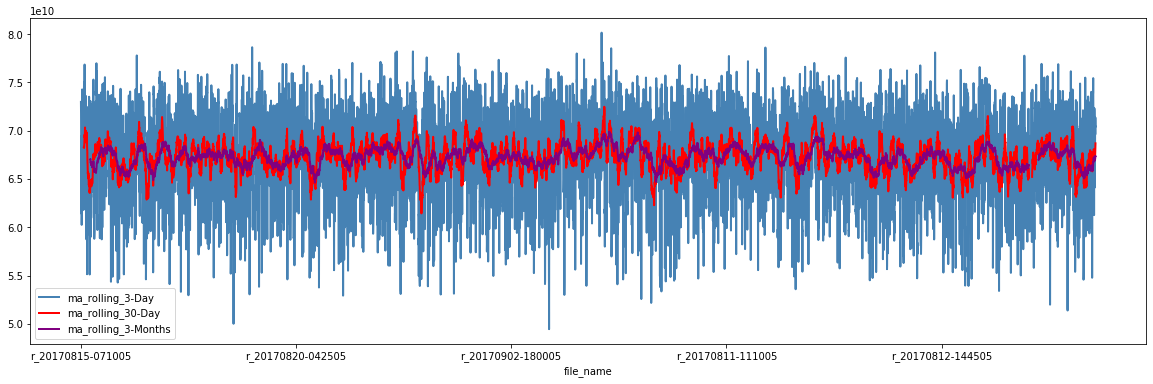

In [242]:
colors = ['steelblue', 'red', 'purple', 'black']

market_cap.plot(color=colors, linewidth=2, figsize=(20,6))


### Weighted moving average

Weighted moving average = (t weighting factor) + ((t-1) weighting factor-1) + ((t-n) * weighting factor-n)/n

**weighted moving average assigns a specific weight or frequency to each observation, with the most recent observation being assigned a greater weight than those in the distant past to obtain the average.**

**Example**

Assume that the number of periods is 10, and we want a weighted moving average of four stock prices of $70, $66, $68, and $69, with the first price being the most recent.

Using the information given, the most recent weighting will be 4/10, the previous period before that will be 3/10, and the next period before that will be 2/10, and the initial period weighting will be 1/10.

The weighting average for the four different prices will be calculated as follows:

#### WMA = [70 x (4/10)] + [66 x (3/10)] + [68 x (2/10)] + [69 x (1/10)]

WMA = $28 + $19.80 + $13.60 + $6.90 = $68.30

![img](https://i.imgur.com/MZO1bbC.png)

The accuracy of this model depends largely on your choice of weighting factors. If the time series pattern changes, you must also adapt the weighting factors.

When creating a weighting group, you enter the weighting factors as percentages. The sum of the weighting factors does not have to be 100%.

/home/paul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


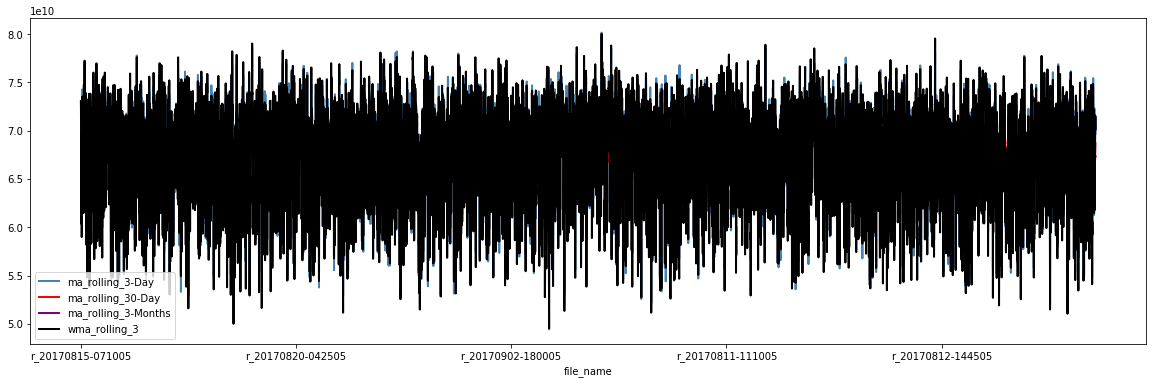

In [243]:
def weighted_mov_avg(weights):
    def calc(x):
        return (weights*x).mean()
    return calc

market_cap['market cap'].rolling(window=3).apply(weighted_mov_avg(np.array([0.5,1,1.5]))).shift(1)

market_cap['wma_rolling_3'] = market_cap['market cap'].rolling(window=3).apply(weighted_mov_avg(np.array([0.5,1,1.5]))).shift(1)
market_cap.plot(color=colors, linewidth=2, figsize=(20,6))

### Exponentially weighted moving average (EMA)

![img](https://i.imgur.com/bFRUfN3.png)

The formula states that the value of the moving average(S) at time t is a mix between the value of raw signal(x) at time t and the previous value of the moving average itself i.e. t-1. It is basically a value between the previous EMA and the current price The degree of mixing is controlled by the parameter a (value between 0–1).

The 'a' in the above is called the smoothing factor and sometime also denonted as  **𝛼** ( alpha ) is defined as:

![img](https://i.imgur.com/DCXU7Vc.jpg)

where 𝑛 is the number of days in our span. Therefore, a 10-day EMA will have a smoothing factor:

So the above Formulae can also be written as by simpley re-arranging the terms in the above formulae

### Exponential moving average = (Closing Price - Previous EMA) * (2/(Alpha + 1)) + Previous EMA

So,
- if a = 10%(small), most of the contribution will come from the previous value of the signal. In this case, “smoothing” will be very strong.
- if a = 90%(large), most of the contribution will come from the current value of the signal. In this case, “smoothing” will be minimum.


By looking at the documentation, we can note that the .ewm() method has an adjust parameter that defaults to True. This parameter adjusts the weights to account for the imbalance in the beginning periods (if you need more detail, see the Exponentially weighted windows section in the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#exponentially-weighted-windows)).

In [244]:
# Now lets implement the ewm() function of Pandas
market_cap['market cap'].ewm(span=3, adjust=False, min_periods=0).mean()

file_name
r_20170815-071005    7.084606e+10
r_20170831-114005    7.378068e+10
r_20170904-085005    7.259623e+10
r_20170819-065505    6.987747e+10
r_20170818-210005    6.856059e+10
                         ...     
r_20170904-132006    6.978009e+10
r_20170817-190505    7.012766e+10
r_20170829-064005    7.123794e+10
r_20170824-044005    6.987917e+10
r_20170821-103506    6.868462e+10
Name: market cap, Length: 9431, dtype: float64

In [245]:
market_cap['ewm_window_3'] = market_cap['market cap'].ewm(span=3, adjust=False, min_periods=0).mean().shift(1)
market_cap

/home/paul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,market cap,ma_rolling_3-Day,ma_rolling_30-Day,ma_rolling_3-Months,wma_rolling_3,ewm_window_3
file_name,,,,,,
r_20170815-071005,70846063125,NaN,NaN,NaN,NaN,NaN
r_20170831-114005,76715293809,NaN,NaN,NaN,NaN,7.084606e+10
r_20170904-085005,71411773702,NaN,NaN,NaN,NaN,7.378068e+10
r_20170819-065505,67158717638,7.299104e+10,NaN,NaN,7.308533e+10,7.259623e+10
r_20170818-210005,67243714005,7.176193e+10,NaN,NaN,7.016917e+10,6.987747e+10
...,...,...,...,...,...,...
r_20170904-132006,71308175058,6.985996e+10,6.701422e+10,6.704794e+10,6.948973e+10,6.825201e+10
r_20170817-190505,70475225454,7.052990e+10,6.752149e+10,6.724237e+10,7.021384e+10,6.978009e+10
r_20170829-064005,72348215185,6.962013e+10,6.799893e+10,6.726716e+10,7.018650e+10,7.012766e+10


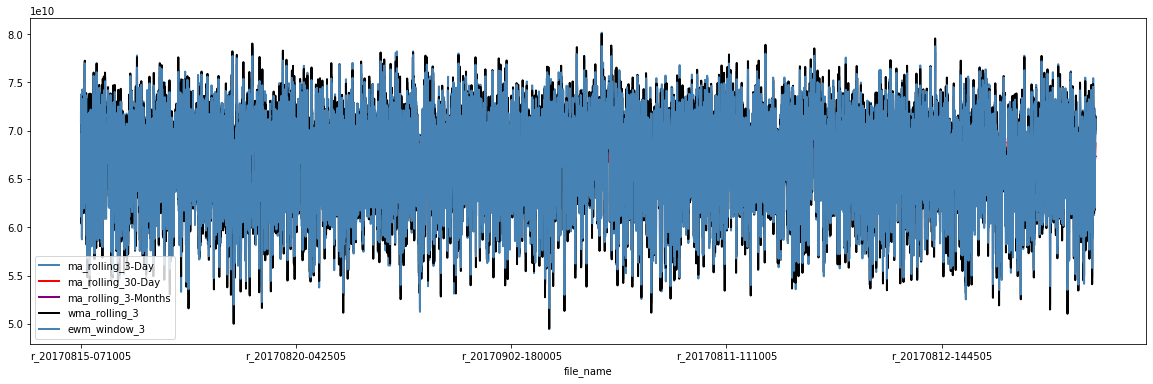

In [246]:
# market_cap.plot(color=colors, linewidth=2, figsize=(20,6))
# Now that we have quite a few columns in the 'market_cap' dataframe
# if I plot the moving averages of all of them, it would become so dense
# and can not separately visible
# so lets plot only the column 'ewm_window_3'
market_cap[['ewm_window_3']].plot(color=colors, linewidth=2, figsize=(20,6))

### What Is Exponential Smoothing?
Exponential smoothing is a time series forecasting method for univariate data. Exponential smoothing forecasting is a weighted sum of past observations, but the model explicitly uses an exponentially decreasing weight for past observations. Specifically, past observations are weighted with a geometrically decreasing ratio.

The underlying idea of an exponential smoothing model is that, at each period, the model will learn a bit from the most recent demand observation and remember a bit of the last forecast it did.

The smoothing parameter (or learning rate) alpha will determine how much importance is given to the most recent demand observation.

![img](https://i.imgur.com/eL82Ugp.jpg)

Where 0 <= alpha <= 1

alpha is a ratio (or a percentage) and  of how much importance the model will allocate to the most recent observation compared to the importance of demand history. The one-step-ahead forecast for time  T+1 is a weighted average of all of the observations in the series  y1,…,yT

In [ ]:
market_cap['market cap'].ewm(alpha=0.7, adjust=False, min_periods=3).mean()
